In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy


In [2]:
WIDTH = 12
HEIGHT = 4
VALIDACTIONS = [(0,1),(1,0),(0,-1),(-1,0)]
EPISODES = 500
RUNS = 100
ALPHA = .5
EPSILON = .1
GAMMA = 1


In [3]:
def walk(s,a):
    if a not in VALIDACTIONS:
        raise ValueError('Invalid action provided')
    
    sX,sY = s
    aX,aY = a

    sXP = max(0,min(WIDTH-1,sX+aX))
    sYP = max(0,min(HEIGHT-1,sY+aY))  
    sP = (sXP,sYP)
    r = -1

    #gone over the cliff
    if sYP == 0 and sXP != 0 and sXP != WIDTH - 1:
        r = -100
        sP = (0,0)
    #Made it 
    elif sP == (WIDTH-1,0):
        r = 0

    return sP,r

In [4]:
def getActionIndex(sG,validActions):
    rand = random.random()
    if rand > EPSILON:
        #do current greedy
        aIndex = np.argmax(sG)
    else: 
        aIndex = random.randint(0,len(validActions)-1)
    return aIndex

In [5]:
def sarsa():
    allRunsRewardsSums = []
    for _ in range(RUNS):
        Q = np.random.rand(WIDTH,HEIGHT,len(VALIDACTIONS))
        Q[WIDTH-1,0] = np.zeros(len(VALIDACTIONS))
        rewardsSums = []
        for _ in range(EPISODES):
            rewardsSum = 0
            s = (0,0)
            aIndex = getActionIndex(Q[s],VALIDACTIONS)

            while(True):
                a = VALIDACTIONS[aIndex]

                sP,r = walk(s,a)
                aPIndex = getActionIndex(Q[sP],VALIDACTIONS)
                aP = VALIDACTIONS[aPIndex]

                Q[s][aIndex] = Q[s][aIndex] + ALPHA * (r + (GAMMA * Q[sP][aPIndex]) - Q[s][aIndex])

                aIndex = aPIndex
                s = sP 
                rewardsSum += r
                
                if (r==0):
                    break
            rewardsSums.append(rewardsSum)
        allRunsRewardsSums.append(deepcopy(rewardsSums))
    
    return np.mean(np.asarray(allRunsRewardsSums),axis=0)

    # return rewardsSums

In [6]:
def QLearning():


    allRunsRewardsSums = []
    for _ in range(RUNS):
        Q = np.random.rand(WIDTH,HEIGHT,len(VALIDACTIONS))
        Q[WIDTH-1,0] = np.zeros(len(VALIDACTIONS))
        rewardsSums = []
        for _ in range(EPISODES):
            rewardsSum = 0
            s = (0,0)
            
            while(True):
                aIndex = getActionIndex(Q[s],VALIDACTIONS)
                a = VALIDACTIONS[aIndex]

                sP,r = walk(s,a)

                Q[s][aIndex] = Q[s][aIndex] + ALPHA * (r + (GAMMA * max(Q[sP]) - Q[s][aIndex]))

                s = sP
                rewardsSum += r
                if (r == 0):
                    break
            rewardsSums.append(rewardsSum)
        allRunsRewardsSums.append(deepcopy(rewardsSums))
    
    return np.mean(np.asarray(allRunsRewardsSums),axis=0)
    # return rewardsSums

In [7]:
QLearningResults = QLearning()
sarsaResults = sarsa()

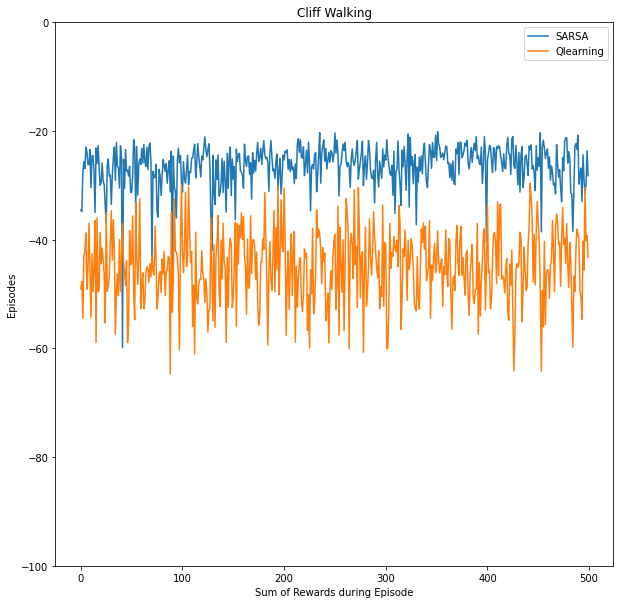

In [9]:
plt.figure(figsize=(10,10))
plt.title("Cliff Walking")
plt.ylabel("Episodes")
plt.xlabel("Sum of Rewards during Episode")
plt.ylim(-100,0)
plt.plot(sarsaResults,label="SARSA")
plt.plot(QLearningResults,label="Qlearning")
plt.legend()
plt.show()